In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_csv("university_data.csv")
#first five rows
df.head()

,university_name,country,num_students,total_score,teaching,research,citations
0,Harvard University,United States of America,"20,152",96.1,99.7,98.7,98.8
1,California Institute of Technology,United States of America,"2,243",96.0,97.7,98.0,99.9
2,Massachusetts Institute of Technology,United States of America,"11,074",95.6,97.8,91.4,99.9
3,Stanford University,United States of America,"15,596",94.3,98.3,98.1,99.2
4,Princeton University,United States of America,"7,929",94.2,90.9,95.4,99.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   university_name  100 non-null    object 
 1   country          100 non-null    object 
 2   num_students     97 non-null     object 
 3   total_score      100 non-null    float64
 4   teaching         100 non-null    float64
 5   research         100 non-null    float64
 6   citations        100 non-null    float64
dtypes: float64(4), object(3)
memory usage: 5.6+ KB


In [6]:
#printing top n universities
n = int(input("Enter top n universities "))
df.head(n)

Enter top n universities 8


,university_name,country,num_students,total_score,teaching,research,citations
0,Harvard University,United States of America,"20,152",96.1,99.7,98.7,98.8
1,California Institute of Technology,United States of America,"2,243",96.0,97.7,98.0,99.9
2,Massachusetts Institute of Technology,United States of America,"11,074",95.6,97.8,91.4,99.9
3,Stanford University,United States of America,"15,596",94.3,98.3,98.1,99.2
4,Princeton University,United States of America,"7,929",94.2,90.9,95.4,99.9
5,University of Cambridge,United Kingdom,"18,812",91.2,90.5,94.1,94.0
6,University of Oxford,United Kingdom,"19,919",91.2,88.2,93.9,95.1
7,"University of California, Berkeley",United States of America,"36,186",91.1,84.2,99.3,97.8


In [7]:
df.dtypes

,0
university_name,object
country,object
num_students,object
total_score,float64
teaching,float64
research,float64
citations,float64


In [8]:
print("Missing values:\n",df.isnull().sum())

Missing values:
 university_name    0
country            0
num_students       3
total_score        0
teaching           0
research           0
citations          0
dtype: int64


In [36]:
# Load the university_data.csv file
df = pd.read_csv('university_data.csv')

# Fill missing values in 'num_students' column with 0
df['num_students'] = df['num_students'].fillna(0)

# Optionally, verify the result by checking for missing values again
print(f"Number of missing values in 'num_students' after filling: {df['num_students'].isna().sum()}")

Number of missing values in 'num_students' after filling: 0


In [11]:
df_sort = df.sort_values('research',ascending=False)
print(df_sort[['university_name','country','total_score','research']].head())

                      university_name                   country  total_score  \
7  University of California, Berkeley  United States of America         91.1   
0                  Harvard University  United States of America         96.1   
3                 Stanford University  United States of America         94.3   
1  California Institute of Technology  United States of America         96.0   
4                Princeton University  United States of America         94.2   

   research  
7      99.3  
0      98.7  
3      98.1  
1      98.0  
4      95.4  


In [14]:
total_scr = df[df['total_score']>=91]
print(total_scr[["university_name","country"]].head(6))

                         university_name                   country
0                     Harvard University  United States of America
1     California Institute of Technology  United States of America
2  Massachusetts Institute of Technology  United States of America
3                    Stanford University  United States of America
4                   Princeton University  United States of America
5                University of Cambridge            United Kingdom


In [20]:
total_scr = df[(df['total_score']>=75) & (df['country']== 'United Kingdom')]
print(total_scr[["university_name","country"]].head(6))

              university_name         country
5     University of Cambridge  United Kingdom
6        University of Oxford  United Kingdom
8     Imperial College London  United Kingdom
21  University College London  United Kingdom


In [24]:
import pandas as pd

# Load the university_data.csv file
df = pd.read_csv('university_data.csv')

# Pivot Table 1: Average total_score by country
pivot_table_1 = pd.pivot_table(df,
                               values='total_score',
                               index='country',
                               aggfunc='mean')
print(pivot_table_1)



                          total_score
country                              
Australia                   63.800000
Canada                      71.275000
China                       66.966667
France                      65.033333
Germany                     63.000000
Hong Kong                   74.100000
Japan                       70.100000
Republic of Ireland         58.900000
Singapore                   72.900000
South Korea                 67.300000
Sweden                      62.400000
Switzerland                 66.225000
United Kingdom              67.935714
United States of America    71.683019


In [27]:
# Pivot Table 2: Sum of num_students and average citations by country
pivot_table_2 = pd.pivot_table(df,
                               values=['num_students', 'citations'],
                               index='country',
                               aggfunc={'num_students': 'sum', 'citations': 'mean'})
print(pivot_table_2)

                          citations  \
country                               
Australia                 77.620000   
Canada                    75.000000   
China                     72.533333   
France                    91.966667   
Germany                   79.733333   
Hong Kong                 97.150000   
Japan                     52.200000   
Republic of Ireland       85.350000   
Singapore                 78.700000   
South Korea               71.000000   
Sweden                    64.950000   
Switzerland               77.550000   
United Kingdom            81.371429   
United States of America  85.577358   

                                                               num_students  
country                                                                      
Australia                                    40,12814,60441,86820,77134,718  
Canada                                             66,19850,15231,32623,823  
China                                                    40,148

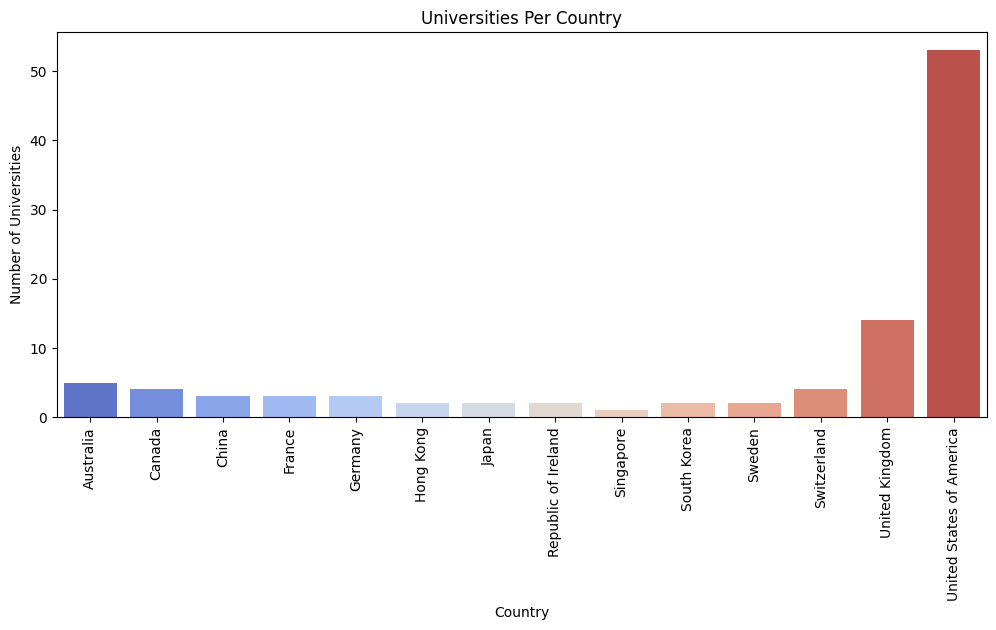

In [21]:
# Count the number of universities per country
country_counts = df.groupby('country').size().reset_index(name='count')

# Plot universities per country
plt.figure(figsize=(12, 5))
sns.barplot(x='country', y='count', data=country_counts, hue='country', palette="coolwarm", legend=False)

# Improve readability
plt.xlabel("Country")
plt.ylabel("Number of Universities")
plt.title("Universities Per Country")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability due to many countries

plt.show()

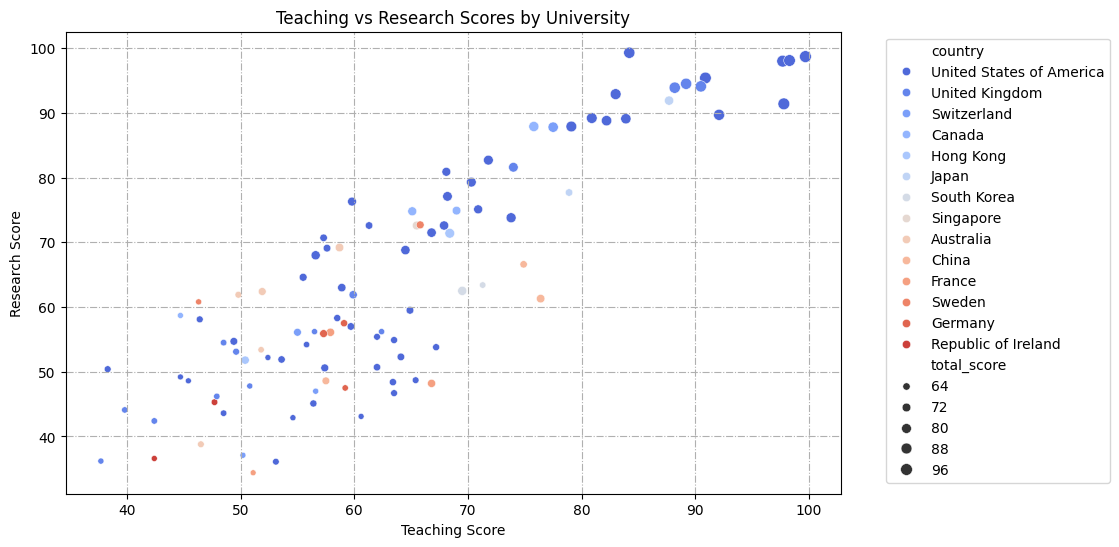

In [35]:
# Scatterplot: Teaching vs Research scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='teaching', y='research', data=df, hue='country', palette='coolwarm', size='total_score')
plt.xlabel("Teaching Score")
plt.ylabel("Research Score")
plt.title("Teaching vs Research Scores by University")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.grid(True,linestyle='-.')
plt.show()


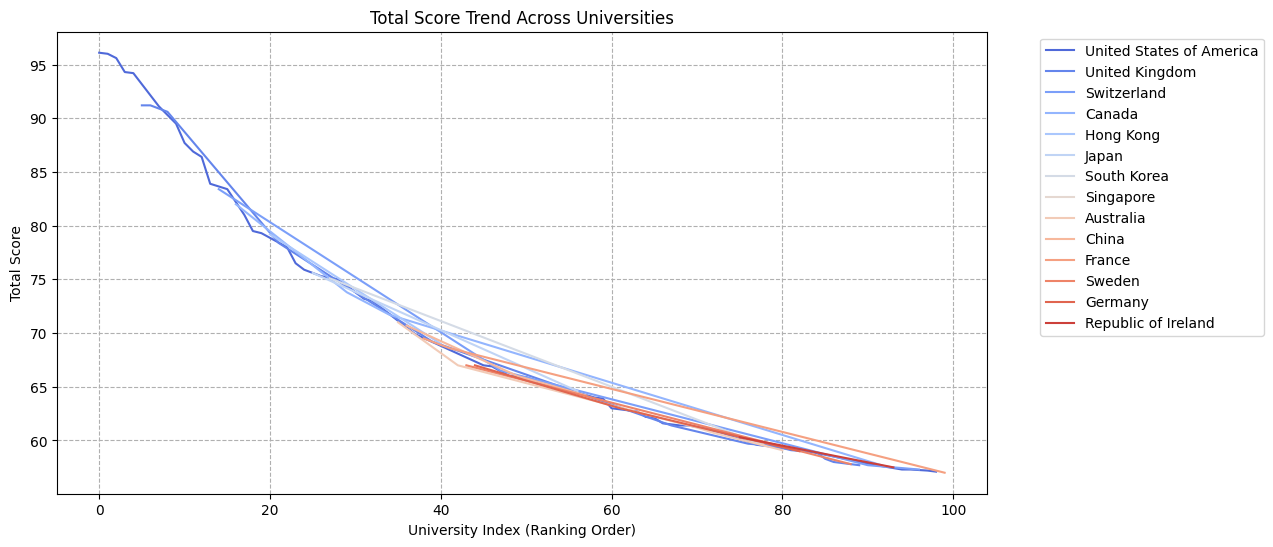

In [30]:
# Line plot: Total score across universities (assuming order reflects ranking)
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='total_score', data=df, hue='country', palette='coolwarm')
plt.xlabel("University Index (Ranking Order)")
plt.ylabel("Total Score")
plt.title("Total Score Trend Across Universities")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.grid(True,linestyle='--')
plt.show()

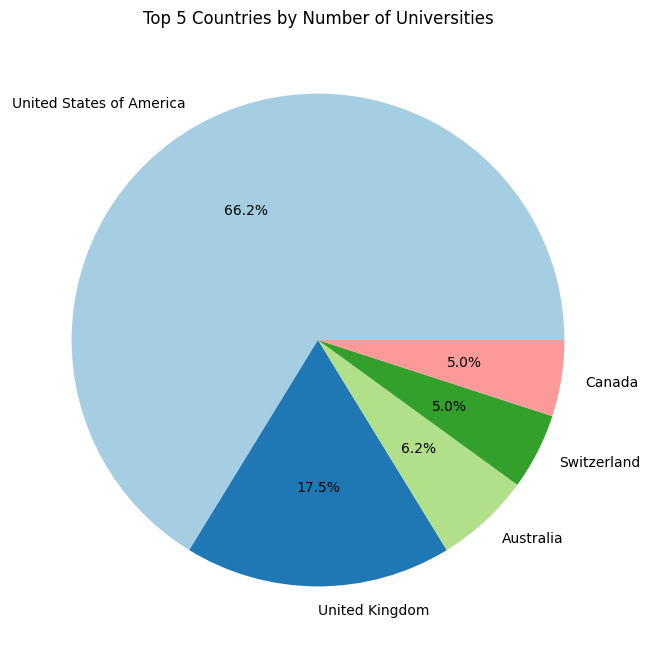

In [37]:
# Load the university_data.csv file
df = pd.read_csv('university_data.csv')

# Count the number of universities per country
country_counts = df['country'].value_counts()

# Create a pie chart for the top 5 countries by university count
plt.figure(figsize=(8, 8))
plt.pie(country_counts[:5], labels=country_counts.index[:5], autopct='%1.1f%%', colors=plt.cm.Paired(range(5)))
plt.title("Top 5 Countries by Number of Universities")
plt.show()